In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


Bad key text.latex.preview in file C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

# Importing Data

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 1 - Cleaning Data

In [4]:
for col in df.columns:
    print("{} : {}".format(col,df[col].isnull().any()))

id : False
gender : False
age : False
hypertension : False
heart_disease : False
ever_married : False
work_type : False
Residence_type : False
avg_glucose_level : False
bmi : True
smoking_status : False
stroke : False


# a - BMI Feature

We can notice that the "bmi" feature contains NaN values

In [5]:
listeNan = df.bmi.isnull()
indexes = []
for i in range(len(listeNan)):
    if(listeNan[i]):
        indexes.append(i)
df.iloc[indexes]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [6]:
#checking the bmi data type
print(df.bmi.dtype)

#getting the non NaN values to compute the mean
bmiNNan = df.bmi[~df.bmi.isnull()]
bmiMean = bmiNNan.mean()

#filling the data set holes with the mean (inplace)
df["bmi"].fillna(value=bmiMean, inplace=True)
df.bmi.isnull().any()

float64


False

# b - ID
The "ID" features doesn't add any signification or valuable infos for analysis or the model

In [7]:
#droping the "ID" column (inplace)
df.drop(columns=["id"], inplace=True)
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


# c - Gender
Since Gender is a categorical variable with no missing values, we can check for other anomalies in the data

In [8]:
#checking distinct values
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

We can see that we have 1 "other" value, and since it's only one observation, we can just drop it :

In [9]:
df = df[df.gender != "Other"]
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

# d - Smoke
TO DO

# 2 - Outliers
TO DO

# 3 - Encoding data
In order to feed our data to the model we have to encode our categorical data and turn them into numerical data

In [10]:
#taking a look into categorical data unique values
for col in df.columns:
    if df[col].dtype == object:
        print("feature : {} | unique values : {}".format(col,df[col].unique()))

feature : gender | unique values : ['Male' 'Female']
feature : ever_married | unique values : ['Yes' 'No']
feature : work_type | unique values : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
feature : Residence_type | unique values : ['Urban' 'Rural']
feature : smoking_status | unique values : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [11]:
#creating encoding dictionary 
encoding_dico = {"gender" : {"Male" : 1, "Female" : 0},
                 "ever_married" : {"Yes" : 1, "No" : 0},
                 "work_type" : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4},
                 "Residence_type" : {"Urban" : 1, "Rural" : 0},
                 "smoking_status": {"never smoked" : 0, "formerly smoked" : 1, "smokes" : 2, "Unknown" : 4}}

#replacing the values
df = df.replace(encoding_dico)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,0,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.893237,0,0
5106,0,81.0,0,0,1,1,1,125.20,40.000000,0,0
5107,0,35.0,0,0,1,1,0,82.99,30.600000,0,0
5108,1,51.0,0,0,1,0,0,166.29,25.600000,1,0


In [14]:
cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

oversampling = SMOTE(sampling_strategy=1)
df[cols], df["stroke"] = oversampling.fit_resample(df[cols],df["stroke"])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,0,1,228.690000,36.600000,1,1
1,0,61.000000,0,0,1,1,0,202.210000,28.893237,0,1
2,1,80.000000,0,1,1,0,0,105.920000,32.500000,0,1
3,0,49.000000,0,0,1,0,1,171.230000,34.400000,2,1
4,0,79.000000,1,0,1,1,0,174.120000,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,81.000000,0,0,1,1,1,125.200000,40.000000,0,0
5106,0,35.000000,0,0,1,1,0,82.990000,30.600000,0,0
5107,1,51.000000,0,0,1,0,0,166.290000,25.600000,1,0
5108,0,44.000000,0,0,1,2,1,85.280000,26.200000,4,0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

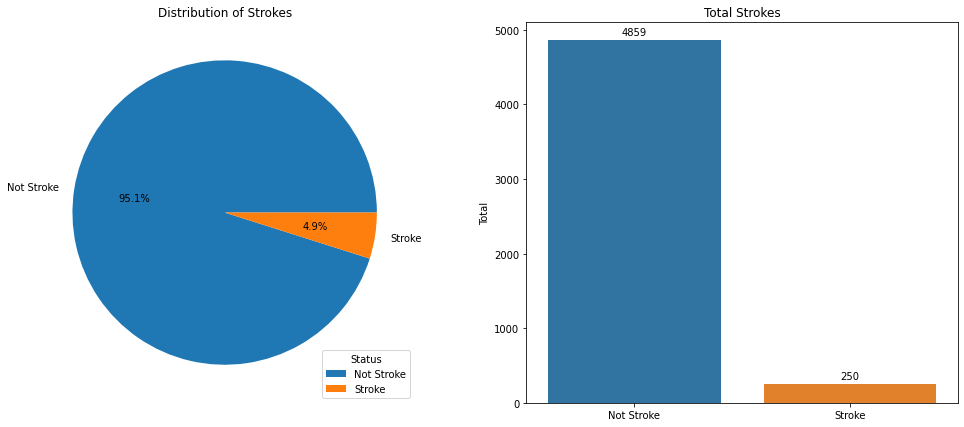

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

ax1.pie(x=df['stroke'].value_counts(), labels=df['stroke'].value_counts().index.map({0:'Not Stroke', 1:'Stroke'}), autopct='%1.1f%%')
ax1.legend(
    title='Status',
    loc = 'lower right')
ax1.set_title('Distribution of Strokes')

plots = sns.barplot(x=df['stroke'].value_counts().index.map({0:'Not Stroke', 1:'Stroke'}), y=df['stroke'].value_counts(), ax=ax2)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
ax2.set_ylabel('Total')
ax2.set_title('Total Strokes')

plt.show()

# Imbalanced Data : Resampling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

predictors = df.drop(columns=["stroke"]).columns
X = df[predictors]
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [17]:
import imblearn
imblearn.__version__

'0.9.0'

In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversampler = RandomOverSampler(sampling_strategy=0.40)
undersampler = RandomUnderSampler(sampling_strategy="majority")

In [41]:
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
X_train_final, y_train_final = undersampler.fit_resample(X_train_over ,y_train_over)

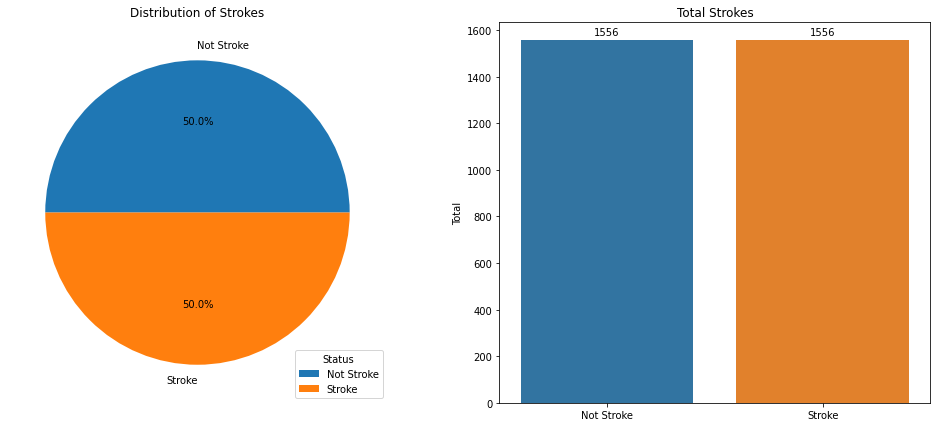

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

ax1.pie(x=y_train_final.value_counts(), labels=y_train_final.value_counts().index.map({0:'Not Stroke', 1:'Stroke'}), autopct='%1.1f%%')
ax1.legend(
    title='Status',
    loc = 'lower right')
ax1.set_title('Distribution of Strokes')

plots = sns.barplot(x=y_train_final.value_counts().index.map({0:'Not Stroke', 1:'Stroke'}), y=y_train_final.value_counts(), ax=ax2)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
ax2.set_ylabel('Total')
ax2.set_title('Total Strokes')

plt.show()

# 4 - Choosing a solver for the Logistic Regression

In [19]:
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
for solver in solvers:
    model = LogisticRegression(solver=solver, penalty="l2") #adding l2 regularization as penalty to avoid overfitting
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    print("solver : {} | acc : {}".format(solver,score))


solver : newton-cg | acc : 0.9471624266144814


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


solver : lbfgs | acc : 0.9481409001956947
solver : liblinear | acc : 0.9471624266144814
solver : sag | acc : 0.9432485322896281
solver : saga | acc : 0.9432485322896281


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


We will pick the newton-cg solver because of the good score and the fast convergence

# Training the final model

In [42]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = LogisticRegression(solver="newton-cg",penalty="l2")
model.fit(X_train_final,y_train_final)
model.score(X_test,y_test)

0.738747553816047

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[713, 256],
       [ 11,  42]], dtype=int64)

In [44]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))
print(len(y_test[y_test==0]))
print(len(y_test[y_test==1]))



3890
197
969
53


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       969
           1       0.14      0.79      0.24        53

    accuracy                           0.74      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.74      0.81      1022



In [55]:
import pickle
file = open("stroke_model.pkl", "wb")
pickle.dump(model, file)

In [49]:
help(pickle.dump)

Help on built-in function dump in module _pickle:

dump(obj, file, protocol=None, *, fix_imports=True)
    Write a pickled representation of obj to the open file object file.
    
    This is equivalent to ``Pickler(file, protocol).dump(obj)``, but may
    be more efficient.
    
    The optional *protocol* argument tells the pickler to use the given
    protocol supported protocols are 0, 1, 2, 3 and 4.  The default
    protocol is 3; a backward-incompatible protocol designed for Python 3.
    
    Specifying a negative protocol version selects the highest protocol
    version supported.  The higher the protocol used, the more recent the
    version of Python needed to read the pickle produced.
    
    The *file* argument must have a write() method that accepts a single
    bytes argument.  It can thus be a file object opened for binary
    writing, an io.BytesIO instance, or any other custom object that meets
    this interface.
    
    If *fix_imports* is True and protocol is less